In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os

# THE HUMAN EYE

### In this problem you will implement the contrast sensitivity function (CSF) based living room design.Write a Python script that accepts the TV specifications (size, resolution), the available distance for the couch placement (from the TV), and outputs the “optimal” distance. Assume that the couch is placed directly in front of the TV. You are expected to handle corner cases gracefully.

In [2]:
print("Enter the size of TV :")
size = int(input())
print("Enter Resolution of the TV seperated by comma :")
W,H = map(int,input().split(','))
print("Enter available distance(inches):")
D = int(input())
w = 60*2*size
w = w/W
theta = 1.0
theta = math.radians(theta)
theta = theta/2
v = math.tan(theta)
v = 2*v
d = w/v
if(d<D):
	print("Optimal Distance(inches):",d)
else:
	print("Optimal Distance(inches):",D)
	print("ERROR : Optimal Distance greater than distance available")

Enter the size of TV :
40
Enter Resolution of the TV seperated by comma :
1920,1080
Enter available distance(inches):
130
Optimal Distance(inches): 130
ERROR : Optimal Distance greater than distance available


## THE BASICS

### 1. Read the contents of an image into an array I (recall from class that digital images are represented as an array of numbers)

In [3]:
I =[]
image_path = "Desktop/5.1.10.tiff"
img = plt.imread(image_path)
I = np.array(img)
print(I)
print(I.shape)

[[122 182 184 ... 137 136 130]
 [129 178 188 ... 128 135 146]
 [166 170 185 ... 134 131 152]
 ...
 [102 138 125 ...  87  82  93]
 [ 92 146 127 ...  78  83  90]
 [  2   2   4 ...  29  25  32]]
(256, 256)


### 2. Display the image I

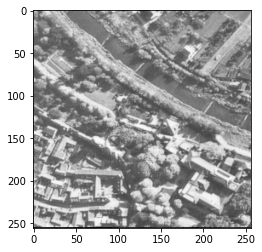

In [4]:
plot = plt.imshow(I,cmap='gray')

### 3. Print the maximum and minimum pixel values of I. Based on these values, how many bits are needed (used) per pixel?

In [5]:
x = I.reshape(-1)
pxmin = x.min()
pxmax = x.max()
print("Minimum pixel value :",pxmin)
print("Minimum pixel value :",pxmax)
print(x.shape)

Minimum pixel value : 1
Minimum pixel value : 248
(65536,)


In [6]:
diff = pxmax - pxmin
bpp = math.log2(diff)
bpp = math.ceil(bpp)
print("Bits per pixel :",bpp)

Bits per pixel : 8


### 4. Resolution of Image

In [7]:
print("The resolution is :", img.shape)

The resolution is : (256, 256)


### 5. What is the size of compressed image you downloaded?

In [8]:
file_size = os.path.getsize(image_path)
print(file_size)

65670


### 6. Based on the previous answers and assuming 256 gray levels, how efficienctly is the image compressed for storage?

In [9]:
w = img.shape[0]
h = img.shape[1]
tot_pixels = w*h
memory = tot_pixels*bpp
prop_memory = file_size*8
eff = memory/prop_memory
print("Compression Efficiency: ",eff)

Compression Efficiency:  0.9979594944419065


System memory of the file is greater than calculated memory

### 7. Display each bitplane of the image I as a binary image.

In [10]:
def binary(arr,k):
    den = pow(2,k)
    bit = arr/den
    bit = np.floor(bit%2)
    return bit

In [11]:
lsb = binary(I,0)
mid1 = binary(I,1)
mid2 = binary(I,2)
mid3 = binary(I,3)
mid4 = binary(I,4)
mid5 = binary(I,5)
mid6 = binary(I,6)
msb = binary(I,7)
msb.shape

(256, 256)

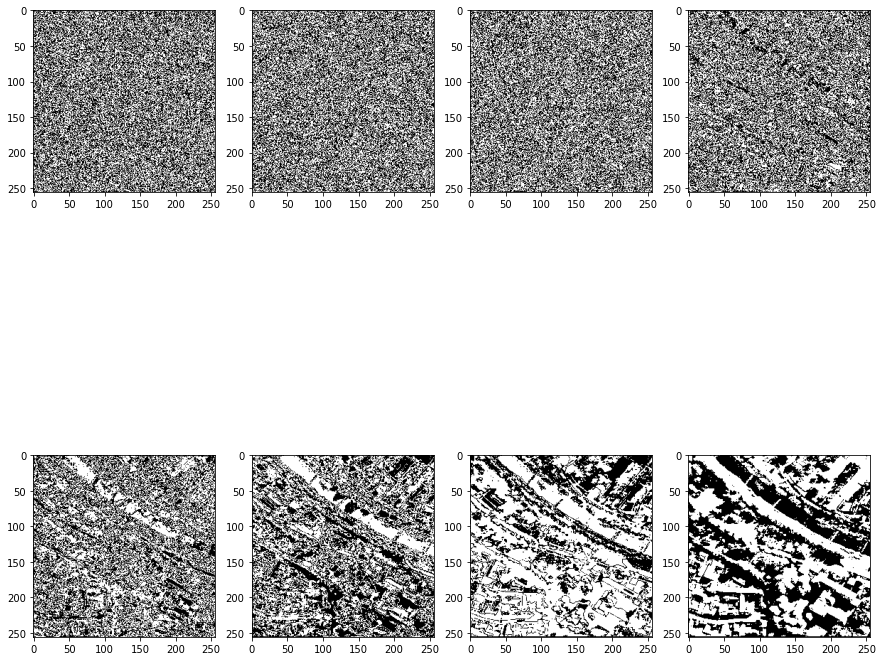

In [12]:
fig,ax = plt.subplots(2,4,figsize=(15,15))
ax[0][0].imshow(lsb,cmap='gray')
ax[0][1].imshow(mid1,cmap='gray')
ax[0][2].imshow(mid2,cmap='gray')
ax[0][3].imshow(mid3,cmap='gray')
ax[1][0].imshow(mid4,cmap='gray')
ax[1][1].imshow(mid5,cmap='gray')
ax[1][2].imshow(mid6,cmap='gray')
ax[1][3].imshow(msb,cmap='gray')

### 8. Starting with the lowest bitplane, set each bitplane to 0 and display the resulting gray scale image (you will ultimately display a black image). Can you draw any conclusions on the importance of one bitplane over another?

In [13]:
def image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb):
    reconstruct = pow(2,0)*lsb + pow(2,1)*mid1 + pow(2,2)*mid2 + pow(2,3)*mid3 + pow(2,4)*mid2 + pow(2,5)*mid2+ pow(2,6)*mid1 + pow(2,7)*msb
    reconstruct = np.array(reconstruct)
    return reconstruct

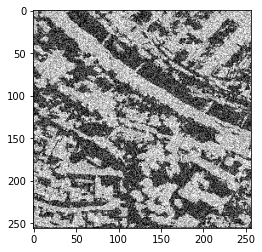

In [14]:
lsb = np.zeros((img.shape[0],img.shape[1]),'float') #lowest bitplane set to zero
im1 = image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(im1,cmap='gray')

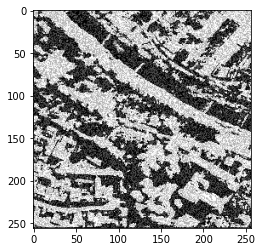

In [15]:
mid1 = np.zeros((img.shape[0],img.shape[1]),'float')
im2 = image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(im2,cmap='gray')

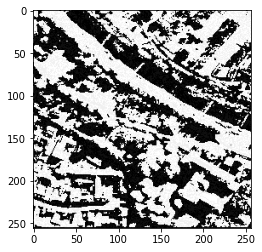

In [16]:
mid2 = np.zeros((img.shape[0],img.shape[1]),'float')  #Last 3 bitplanes set to zero
im3= image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(im3,cmap='gray')
plt.savefig("binarized.png")

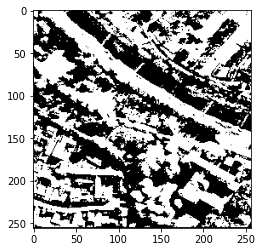

In [17]:
mid3 = np.zeros((img.shape[0],img.shape[1]),'float') #Last 4 bitplanes set to zero
im4 = image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(im4,cmap='gray')

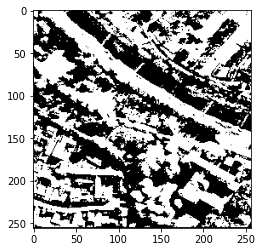

In [18]:
mid4 = np.zeros((img.shape[0],img.shape[1]),'float') #Last 5 bitplanes set to zero
im5 = image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(im5,cmap='gray')

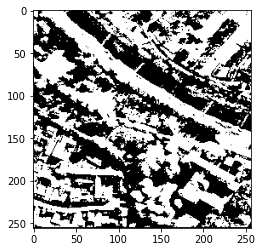

In [19]:
mid5 = np.zeros((img.shape[0],img.shape[1]),'float') #Bottom 6 bitplanes set to zero
im6 = image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(im5,cmap='gray')

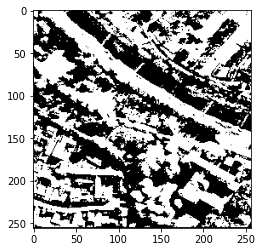

In [20]:
mid6 = np.zeros((img.shape[0],img.shape[1]),'float')
im7 = image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(im7,cmap='gray')

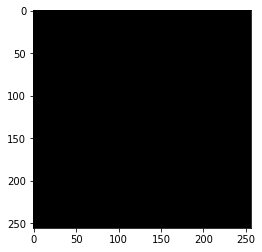

In [21]:
msb = np.zeros((img.shape[0],img.shape[1]),'float')
im8 = image(lsb,mid1,mid2,mid3,mid4,mid5,mid6,msb)
plt.imshow(msb,cmap='gray')

##### CONCLUSION : Bit planes of higher significance (msb in this case), when set to zero bring in noticable changes to the image

### 9. Starting with 256 gray levels (8 bits per pixel), decrease the quantization level by 1 bit per pixel until you reach 2 gray levels. Re-quantize at each rate and display the resulting image.

Text(0.5, 1.0, '2 gray levels')

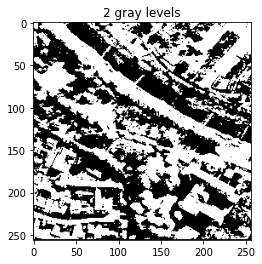

In [22]:
for b  in range (1,8):
    den = pow(2,b)
    q = np.floor(img/den)
plt.imshow(q,cmap='gray')
plt.title("2 gray levels")

In [23]:
req_1 = q*2    
req_2 = q*4               
req_3 = q*8
req_4 = q*16  
req_5 = q*32
req_6 = q*64
req_7 = q*128 #mapped to 256 gray levels

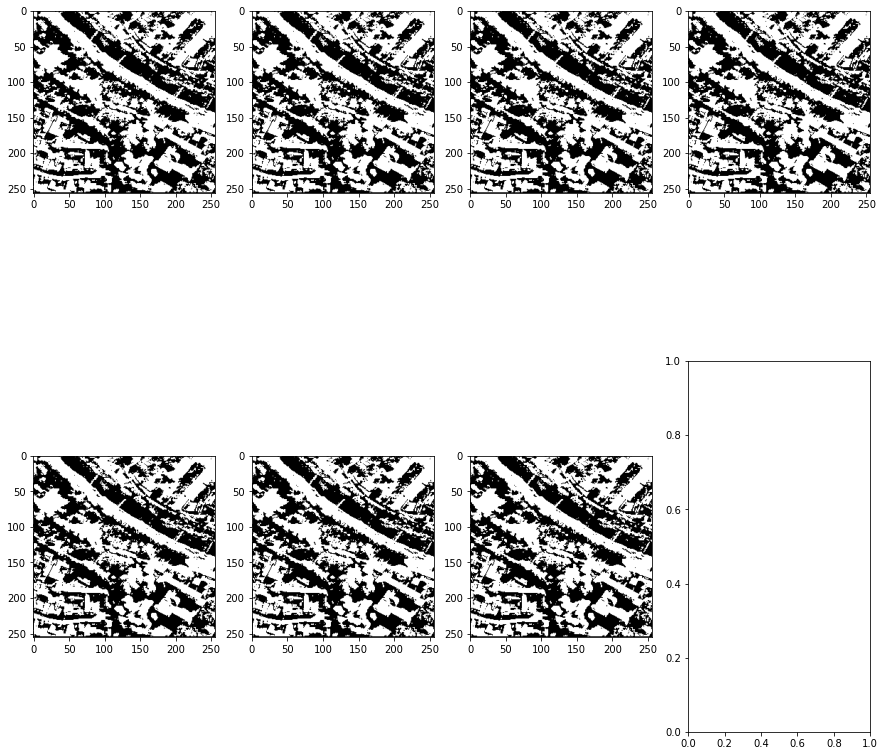

In [24]:
fig,ax = plt.subplots(2,4,figsize=(15,15))
ax[0][0].imshow(req_1,cmap='gray')
ax[0][1].imshow(req_2,cmap='gray')
ax[0][2].imshow(req_3,cmap='gray')
ax[0][3].imshow(req_4,cmap='gray')
ax[1][0].imshow(req_5,cmap='gray')
ax[1][1].imshow(req_6,cmap='gray')
ax[1][2].imshow(req_7,cmap='gray')

# Binary Morphology

### 1. Write a function to compute the histogram of an image and plot the same. What is the modality of the histogram for the images mentioned above?

In [25]:
def histogram(img):
    pixels = []
    for i in range(0,256):
        pixels.append(i)
    freq = np.zeros(len(pixels))
    for ele in img:
        freq[ele] += 1
    #print(freq)
    plt.bar(pixels,freq)
    plt.ylabel("H(k)")
    plt.xlabel("k")
    plt.show()
    return

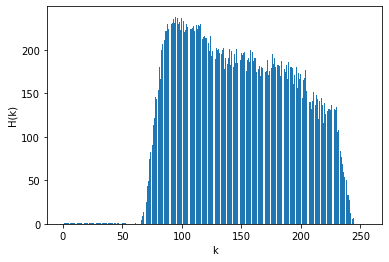

In [26]:
histogram(I)

modality(aerial) : 1

In [ ]:
#mod = 0
#for i in range(1,len(freq)-1):
#    if (freq[i+1]<0.1*freq[i] and freq[i-1]<0.1*freq[i]):
#        mod = mod+1
#print(mod)

### 2. Binarize I using the above histogram following the modal thresholding approach discussed in class. Compare this image with the binary image in the last step of the previous problem.

For bimodal, enter a value between 2 peaks. Else enter any value from 0-255:150


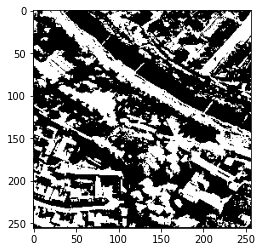

In [41]:
new_arr = np.array(img)
def modal_threshold(I,threshold):
    for i in range(0,I.shape[0]):
        for j in range(I.shape[1]):
            if (I[i][j]<threshold):
                I[i][j] = 0
            else:
                I[i][j] =1
    return I

threshold = int(input("For bimodal, enter a value between 2 peaks. Else enter any value from 0-255:"))
Im = modal_threshold(new_arr,threshold)
plt.imshow(Im,cmap='gray')

#### Conclusion : Binarization of image varies with the threshold.

### 3. Implement the connected components algorithm and use it to label the binarized version of I.

In [42]:
shape = img.shape
R = np.zeros(shape)
R.shape

(256, 256)

In [43]:
reg_ctr = 0

In [44]:
def linking(image,current,neighbour_1,neighbour_2):
    temp = max(neighbour_1,neighbour_2)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[0]-1):
            if (current == temp):
                current = min(neighbour_1,neighbour_2)
    return

In [45]:
for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        if (Im[i][j] == 0 and Im[i][j-1] ==1 and Im[i-1][j]==1):
            R[i][j]=reg_ctr
            reg_ctr += 1
        elif(Im[i][j]==0 and Im[i][j-1]==1 and Im[i-1][j]==0):
            R[i][j] =R[i-1][j]
        elif(Im[i][j]==0 and Im[i][j-1]==0 and Im[i-1][j]==1):
            R[i][j] = R[i][j-1]
        elif(Im[i][j]==0 and Im[i][j-1]==0 and Im[i-1][j]==0):
            R[i][j] = min(R[i][j-1],R[i-1][j])
            if(R[i][j-1] != R[i-1][j]):
                linking(Im,R[i][j],R[i][j-1],R[i-1][j])

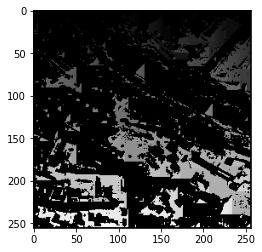

In [46]:
plt.imshow(R,cmap='gray')

### 4. Implement minor blob removal to get rid of minor blobs.

In [47]:
temp = list(R.reshape(-1))

In [52]:
def max_blob(lst): #storing frequencies in a dict
    R_dict ={}
    for ele in lst:
        if(ele in R_dict):
            R_dict[ele] = R_dict[ele]+1
        else:
            R_dict[ele] =1
    return max(R_dict,key= R_dict.get)#finding dict key with max value

max_bb = max_blob(temp)#largest blob

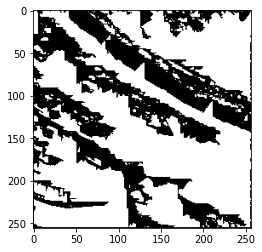

In [53]:
for i in range(0,img.shape[0]): #Minor blob removal algorithm
    for j in range(0,img.shape[1]):
        if(Im[i][j]==0 and R[i][j]!= max_bb):
            Im[i][j]=1
plt.imshow(Im,cmap='gray')
#NOTE : Might show blank images for few other images. 

### 5. Now implement the following filters that take a binary image I and window B as inputs: DILATE, ERODE, MEDIAN. Filter the above binary image using the following windows B = CROSS(5), B = SQUARE(3).

In [50]:
row = {(0,-2),(0,-1),(0,0),(0,1),(0,2)}
col = {(-2,0),(-1,0),(0,0),(1,0),(2,0)}
cross = row | col
print(cross)

{(0, 1), (0, 0), (-1, 0), (-2, 0), (2, 0), (0, -1), (0, -2), (1, 0), (0, 2)}


In [51]:
row1 = {(-1,0),(0,0),(1,0)}
row2 = {(-1,1),(0,1),(1,1)}
row3 = {(-1,-1),(0,-1),(1,-1)}
square = row1 | row2 | row3
print(square)

{(0, 1), (-1, 1), (0, 0), (-1, 0), (-1, -1), (0, -1), (1, 0), (1, -1), (1, 1)}
